In [85]:
from matplotlib import pyplot as plt
import numpy as np
from scipy import optimize
from scipy import integrate

In [2]:
def bisections(func, lower_bound, upper_bound, eps):
    if func(lower_bound) * func(upper_bound) > 0:
        return None
    x0 = (lower_bound + upper_bound) / 2.0
    while abs(lower_bound - upper_bound) >= eps: # func(x0)
        if func(lower_bound) * func(x0) > 0:
            lower_bound = x0
        else:
            upper_bound = x0
        x0 = (lower_bound + upper_bound) / 2.0
    return x0

In [3]:
def func1(_x):
    return 0.6 * _x + 3

def func2(_x):
    return (_x - 2)**3 -1

def func3(_x):
    return 3 / _x

def func13(_x):
    return func1(_x) - func3(_x)

def func23(_x):
    return func2(_x) - func3(_x)

In [71]:
EPS1 = 1e-14

In [72]:
xi0 = bisections(func13, -6.0, -5.0, EPS1)
xi0, func13(xi0)

(-5.854101966249683, 1.1102230246251565e-15)

In [73]:
t0 = optimize.brentq(func13, -6.0, -5.0)
t0, func13(t0)

(-5.854101966249685, 1.1102230246251565e-16)

In [74]:
xi1 = bisections(func1, -6.0, -4.0, EPS1)
xi1, func1(xi1)

(-5.0000000000000036, -2.220446049250313e-15)

In [75]:
t1 = optimize.brentq(func1, -6.0, -4.0)
t1, func1(t1)

(-5.0, 0.0)

In [76]:
xi2 = bisections(func23, -1.0, -0.01, EPS1)
xi2, func23(xi2)

(-0.24392885390371508, -9.947598300641403e-14)

In [77]:
t2 = optimize.brentq(func23, -1.0, -0.01)
t2, func23(t2)

(-0.2439288539037136, 1.7763568394002505e-15)

In [78]:
xi3 = bisections(func13, 0.01, 1.0, EPS1)
xi3, func13(xi3)

(0.8541019662496812, -1.5987211554602254e-14)

In [79]:
t3 = optimize.brentq(func13, 0.01, 1.0)
t3, func13(t3)

(0.8541019662498792, 9.174883075502294e-13)

In [80]:
xi4 = bisections(func2, 2.0, 4.0, EPS1)
xi4, func2(xi4)

(2.9999999999999964, -1.0658141036401503e-14)

In [81]:
t4 = optimize.brentq(func2, 2.0, 4.0)
t4, func2(t4)

(3.0, 0.0)

In [82]:
xi5= bisections(func23, 2.0, 4.0, EPS1)
xi5, func23(xi5)

(3.2439288539037143, 3.774758283725532e-15)

In [83]:
t5 = optimize.brentq(func23, 2.0, 4.0)
t5, func23(t5)

(3.2439288539037134, -7.771561172376096e-16)

In [13]:
x = np.arange(-10.005, 10.005, 0.01)
x1 = np.arange(-10.005, -0.005, 0.01)
x2 = np.arange(0.005, 10.005, 0.01)

In [14]:
f1 = 0.6*x+3
f2 = (x-2)**3-1
f31 = 3/x1
f32 = 3/x2


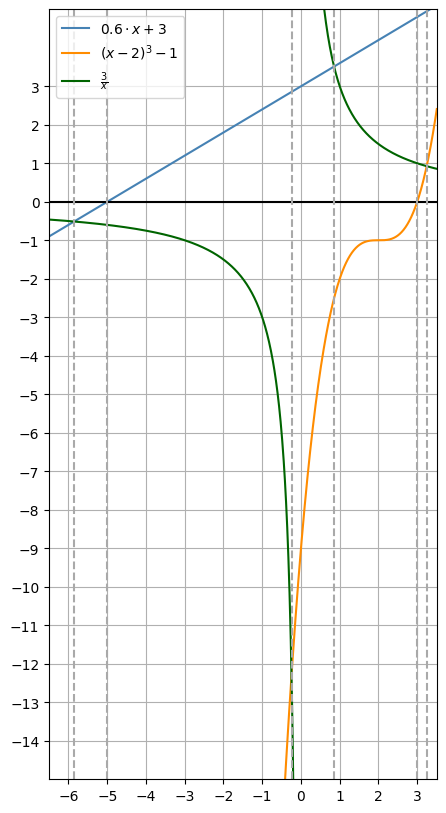

In [15]:
fig, ax = plt.subplots(1,1,figsize=(5,10))

ax.plot(x, f1, label=r"$0.6 \cdot x + 3$", color='steelblue')
ax.plot(x, f2, label=r"$(x-2)^3-1$", color='darkorange')
ax.plot(x1, f31, label=r"$\frac{3}{x}$", color='darkgreen')
ax.plot(x2, f32, color='darkgreen')
ax.set_xlim(-6.5, 3.5)
ax.set_ylim(-15.0, 5.0)
ax.axhline(0.0, color='black', ls='-')
ax.axvline(xi0, color='darkgrey', ls='--')
ax.axvline(xi1, color='darkgrey', ls='--')
ax.axvline(xi2, color='darkgrey', ls='--')
ax.axvline(xi3, color='darkgrey', ls='--')
ax.axvline(xi4, color='darkgrey', ls='--')
ax.axvline(xi5, color='darkgrey', ls='--')
ax.set_xticks(np.arange(-6, 4, 1))
ax.set_yticks(np.arange(-14, 4, 1))
ax.grid()
ax.legend();

In [16]:
def simpson(func, a, b, eps):
    n = int(round((b - a) / eps))
    _x = [a + i*eps for i in range (1 ,n)]
    #Расчет подынтегральной суммы
    #s1 - сумма элементов с нечетными индексами
    #s2 - сумма элементов с четными индексами
    s1 , s2 = 0 , 0
    for i in range(len(_x)):
        if i % 2 != 0:
            s1 += func(_x[i])
        else:
            s2 += func(_x[i])
    return eps / 3 * (func(a) + 2 * s1 + 4 * s2 + func(b))

In [17]:
EPS2 = 1e-6

In [29]:
s_lower_0 = abs(simpson(func3, xi0, xi2, EPS2))
s_lower_0

9.534058373467115

In [30]:
s_lower_1 = abs(simpson(func1, xi0, xi1, EPS2))
s_lower_1

0.21884705062547874

In [31]:
s_lower_2 = abs(simpson(func2, xi2, xi4, EPS2))
s_lower_2

9.332280661371962

In [25]:
s_upper_0 = simpson(func1, xi1, xi3, EPS2)
s_upper_0

10.281153067921183

In [26]:
s_upper_1 = simpson(func3, xi3, xi5, EPS2)
s_upper_1

4.003469490587398

In [27]:
s_upper_2 = simpson(func2, xi4, xi5, EPS2)
s_upper_2

0.10465093668773649

In [32]:
S = (s_lower_0 - s_lower_1 + s_lower_2) + (s_upper_0 + s_upper_1 - s_upper_2)
S

32.82746360603444

In [87]:
integrate.quad(func3, t0, t2, epsabs=1e-14)

(-9.53406385471627, 9.082740242840229e-11)

In [88]:
integrate.quad(func1, t0, t1, epsabs=1e-14)

(-0.2188470506254732, 2.429690344757076e-15)

In [89]:
integrate.quad(func2, t2, t4, epsabs=1e-14)

(-9.332280661371847, 1.0360912862519108e-13)

In [90]:
integrate.quad(func1, t1, t3, epsabs=1e-14)

(10.28115294937521, 1.1414372724089194e-13)

In [92]:
integrate.quad(func3, t3, t5, epsabs=1e-14)

(4.003469694956835, 5.958370738704707e-11)

In [93]:
integrate.quad(func2, t4, t5, epsabs=1e-14)

(0.10465110984503151, 1.1618607170253037e-15)